In [1]:
import numpy as np
import astropy.io.fits as fits
import matplotlib
import matplotlib.pyplot as plt
import RMtools_3D
import matplotlib.patches as patches
from reproject import reproject_interp
from scipy.stats import moment
from RMtools_3D.RMpeakfit_3D import pixelwise_peak_fitting
from astropy.wcs import WCS
from astropy import units as u
from astropy.visualization.wcsaxes import add_beam, add_scalebar

Compares CHIME and WMAH H-Alpha in a similar fashion as to Fan Region paper I

## Chime

In [7]:
fn = '/srv/data/chime/chime_QU_Oct2023_400_729/Q_400_729_Oct2023_new_gal_fix.fits'
hdr_chimeQ = fits.getheader(fn)
chimeQ = fits.getdata(fn)

fn = '/srv/data/chime/chime_QU_Oct2023_400_729/U_400_729_Oct2023_new_gal_fix.fits'
hdr_chimeU = fits.getheader(fn)
chimeU = fits.getdata(fn)

wcs_chime=WCS(hdr_chimeQ)

In [3]:
window =  wcs_chime.wcs_world2pix([90,160], [-20, 20], 1, 1)[0:2]
idx_chime = [slice(int(window[1][0]), int(window[0][0])), slice(int(window[0][1]), int(window[1][1]))]

In [4]:
chime_pI = np.sqrt(chimeQ**2 + chimeU**2) #of just Fan Region
chime_pA = 0.5*np.arctan2(chimeU, chimeQ) #of just Fan Region

## H alpha

In [8]:
hdu_Halpha = fits.open('/srv/data/wham/wham-ss-DR1-v161116-170912-grid_hdrfixed.fits')
hdr_Halpha = hdu_Halpha[0].header
Halpha_map = hdu_Halpha[0].data
wcs_Halpha = WCS(hdr_Halpha)

In [9]:
window =  wcs_Halpha.wcs_world2pix([90,160], [-20, 20], 1, 1)[0:2]
idx_halpha = [slice(int(window[1][0]), int(window[0][0])), slice(int(window[0][1]), int(window[1][1]))]

In [10]:
halpha_BT = Halpha_map[:, idx_halpha[0], idx_halpha[1]]

In [14]:
print(wcs_Halpha.wcs_world2pix(1, 1, [-74000, 15000], 1)[2])
all_velocities = np.sum(Halpha_map[48:92], axis=0)

[47.91109599 91.80578818]


In [11]:
print(wcs_Halpha.wcs_world2pix(1, 1, [-74000, -30000], 1)[2])
perseus_velocities = np.sum(Halpha_map[48:70], axis=0)

[47.91109599 69.61184269]


In [12]:
print(wcs_Halpha.wcs_world2pix(1, 1, [-15000, 15000], 1)[2])
local_velocities = np.sum(Halpha_map[77:92], axis=0)

[77.00982452 91.80578818]


In [15]:
all_vel_2chime, footprint = reproject_interp((all_velocities,wcs_Halpha.celestial), wcs_chime.celestial, (1440, 2880))
perseus_vel_2chime, footprint = reproject_interp((perseus_velocities,wcs_Halpha.celestial), wcs_chime.celestial, (1440, 2880))
local_vel_2chime, footprint = reproject_interp((local_velocities,wcs_Halpha.celestial), wcs_chime.celestial, (1440, 2880))

<function matplotlib.pyplot.show(close=None, block=None)>

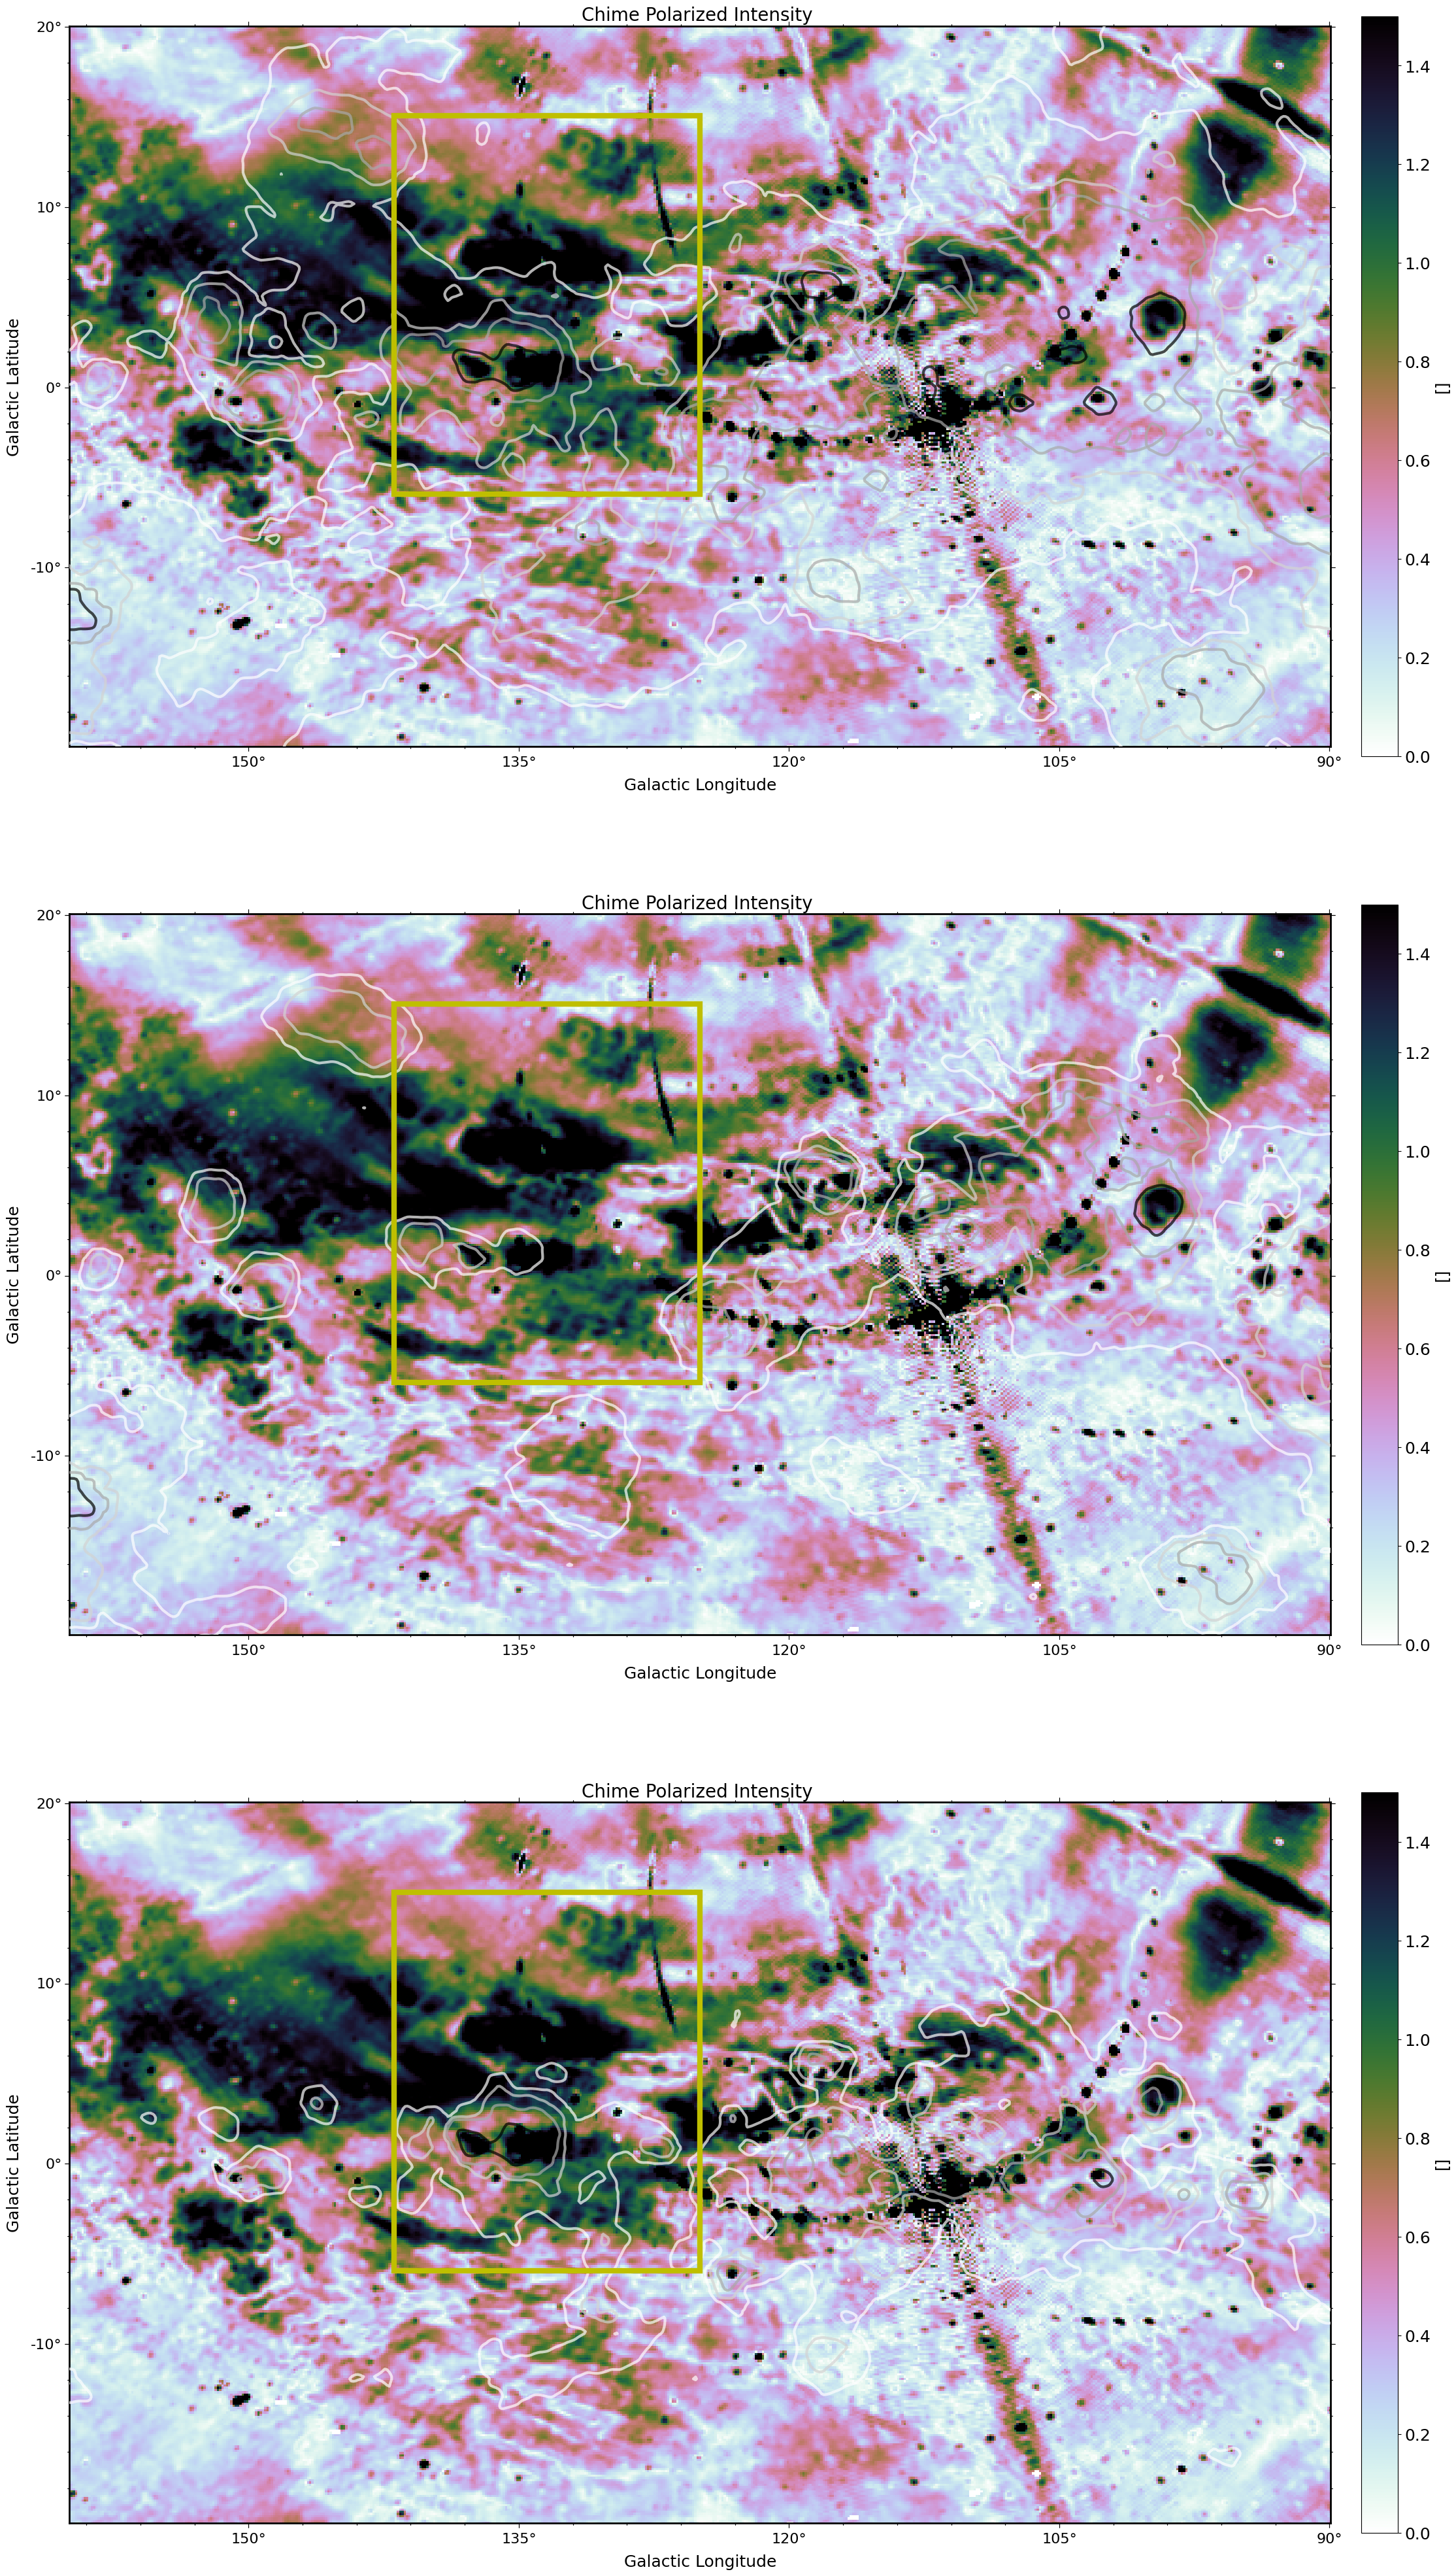

In [16]:
## for k in np.arange(0, 30):
fig = plt.figure(figsize=(30, 50))

ax = fig.add_subplot(311, projection=wcs_chime.celestial)
im = ax.imshow(chime_pI[297], cmap='cubehelix_r', interpolation='none', vmin=0, vmax=1.5)

ax.set_title(r"Chime Polarized Intensity ", 
             fontsize=20)
olors = ['white', 'lightgrey', 'darkgrey', 'black']
levels = [2, 4, 8, 32]  # Define contour levels to use
ax.contour(all_vel_2chime, alpha=0.7, colors=olors, levels=levels, linewidths=3)#, linestyles='-.')     # creating contour

ax.set_xlim(160, 720)
ax.set_ylim(560, 880)

rect=patches.Rectangle((304,672), 136, 168, edgecolor='y', facecolor='none', linewidth=6, zorder=100)
ax.add_patch(rect)

ax.set_xlabel("Galactic Longitude", fontsize=18)
ax.set_ylabel("Galactic Latitude", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label(r'[]', fontsize=18)

######################################
######################################
######################################

ax = fig.add_subplot(312, projection=wcs_chime.celestial)
im = ax.imshow(chime_pI[297], cmap='cubehelix_r', interpolation='none', vmin=0, vmax=1.5)

ax.set_title(r"Chime Polarized Intensity ", 
             fontsize=20)
olors = ['white', 'lightgrey', 'darkgrey', 'black']
levels = [2, 4, 8, 32]  # Define contour levels to use
ax.contour(local_vel_2chime, alpha=0.7, colors=olors, levels=levels, linewidths=3)#, linestyles='-.')     # creating contour

ax.set_xlim(160, 720)
ax.set_ylim(560, 880)
rect=patches.Rectangle((304,672), 136, 168, edgecolor='y', facecolor='none', linewidth=6, zorder=100)
ax.add_patch(rect)
ax.set_xlabel("Galactic Longitude", fontsize=18)
ax.set_ylabel("Galactic Latitude", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label(r'[]', fontsize=18) 

######################################
######################################
######################################

ax = fig.add_subplot(313, projection=wcs_chime.celestial)
im = ax.imshow(chime_pI[297], cmap='cubehelix_r', interpolation='none', vmin=0, vmax=1.5)

ax.set_title(r"Chime Polarized Intensity ", 
             fontsize=20)
olors = ['white', 'lightgrey', 'darkgrey', 'black']
levels = [2, 4, 8, 32]  # Define contour levels to use
ax.contour(perseus_vel_2chime, alpha=0.7, colors=olors, levels=levels, linewidths=3)#, linestyles='-.')     # creating contour

ax.set_xlim(160, 720)
ax.set_ylim(560, 880)
rect=patches.Rectangle((304,672), 136, 168, edgecolor='y', facecolor='none', linewidth=6, zorder=100)
ax.add_patch(rect)
ax.set_xlabel("Galactic Longitude", fontsize=18)
ax.set_ylabel("Galactic Latitude", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[0].display_minor_ticks(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
cbar = plt.colorbar(im, ax=ax, shrink=1, pad=0.02)
cbar.ax.tick_params(labelsize=18)
cbar.set_label(r'[]', fontsize=18) 

<function matplotlib.pyplot.show(close=None, block=None)>

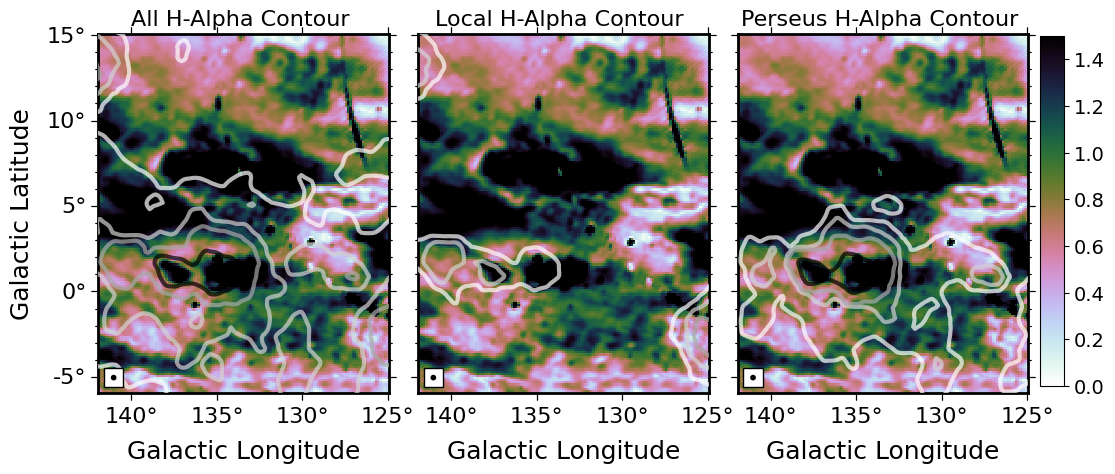

In [17]:

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(131, projection=wcs_chime.celestial)
im = ax.imshow(chime_pI[297], cmap='cubehelix_r', interpolation='none', vmin=0, vmax=1.5)

ax.set_title(r"All H-Alpha Contour ", 
             fontsize=16)
olors = ['white', 'lightgrey', 'darkgrey', 'black']
levels = [2, 4, 8, 32]  # Define contour levels to use
ax.contour(all_vel_2chime, alpha=0.7, colors=olors, levels=levels, linewidths=3)#, linestyles='-.')     # creating contour

ax.set_xlim(304, 440)
ax.set_ylim(672, 840)

ax.set_xlabel("Galactic Longitude", fontsize=18)
ax.set_ylabel("Galactic Latitude", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[1].set_ticks_visible(True)
ax.coords[1].set_ticklabel_visible(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
add_beam(ax, major=20 *u.arcmin, minor=20*u.arcmin, angle=0, frame=True, facecolor='k')
######################################
######################################
######################################

ax = fig.add_subplot(132, projection=wcs_chime.celestial)
im = ax.imshow(chime_pI[297], cmap='cubehelix_r', interpolation='none', vmin=0, vmax=1.5)

ax.set_title(r"Local H-Alpha Contour ", 
             fontsize=16)
olors = ['white', 'lightgrey', 'darkgrey', 'black']
levels = [2, 4, 8, 32]  # Define contour levels to use
ax.contour(local_vel_2chime, alpha=0.7, colors=olors, levels=levels, linewidths=3)#, linestyles='-.')     # creating contour

ax.set_yticklabels([])
ax.set_xlim(304, 440)
ax.set_ylim(672, 840)
ax.set_xlabel("Galactic Longitude", fontsize=18)
ax.set_ylabel(" ", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[1].set_ticks_visible(True)
ax.coords[1].set_ticklabel_visible(False)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)
add_beam(ax, major=20 *u.arcmin, minor=20*u.arcmin, angle=0, frame=True, facecolor='k')
######################################
######################################
######################################

ax = fig.add_subplot(133, projection=wcs_chime.celestial)
im = ax.imshow(chime_pI[297], cmap='cubehelix_r', interpolation='none', vmin=0, vmax=1.5)

ax.set_title(r"Perseus H-Alpha Contour ", 
             fontsize=16)
olors = ['white', 'lightgrey', 'darkgrey', 'black']
levels = [2, 4, 8, 32]  # Define contour levels to use
ax.contour(perseus_vel_2chime, alpha=0.7, colors=olors, levels=levels, linewidths=3)#, linestyles='-.')     # creating contour


ax.set_xlim(304, 440)
ax.set_ylim(672, 840)
ax.set_xlabel("Galactic Longitude", fontsize=18)
ax.set_ylabel(" ", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)

ax.coords[1].set_ticks_visible(True)
ax.coords[1].set_ticklabel_visible(False)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)

#cbar = plt.colorbar(im, ax=ax, shrink=0.5)
#cbar.ax.tick_params(labelsize=18)

#fig.colorbar(im, ax=ax)
add_beam(ax, major=20 *u.arcmin, minor=20*u.arcmin, angle=0, frame=True, facecolor='k')
cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = plt.colorbar(im, cax=cbar_ax, shrink=0.8)
#cbar.set_label('Colorbar Label', fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Adjust layout
fig.subplots_adjust(right=0.9)
fig.subplots_adjust(wspace=0.1)

<function matplotlib.pyplot.show(close=None, block=None)>

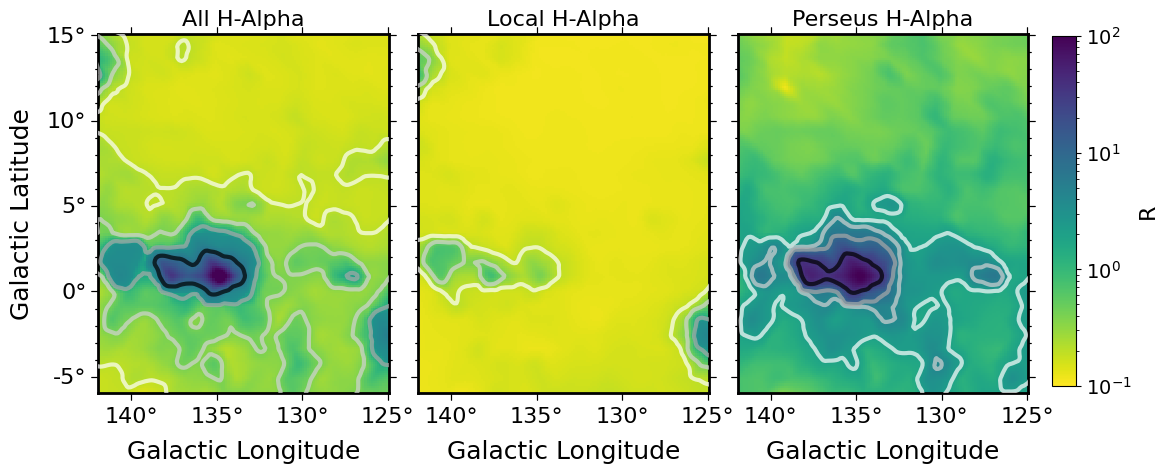

In [18]:

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(131, projection=wcs_chime.celestial)
im = ax.imshow(all_vel_2chime, cmap='viridis_r', interpolation='none',
               norm=matplotlib.colors.TwoSlopeNorm(vcenter=10,vmin=0,vmax=100))

ax.set_title(r"All H-Alpha", 
             fontsize=16)
olors = ['white', 'lightgrey', 'darkgrey', 'black']
levels = [2, 4, 8, 32]  # Define contour levels to use
ax.contour(all_vel_2chime, alpha=0.7, colors=olors, levels=levels, linewidths=3)#, linestyles='-.')     # creating contour

ax.set_xlim(304, 440)
ax.set_ylim(672, 840)

ax.set_xlabel("Galactic Longitude", fontsize=18)
ax.set_ylabel("Galactic Latitude", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[1].set_ticks_visible(True)
ax.coords[1].set_ticklabel_visible(True)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)

######################################
######################################
######################################

ax = fig.add_subplot(132, projection=wcs_chime.celestial)
im = ax.imshow(local_vel_2chime, cmap='viridis_r', interpolation='none',
               norm=matplotlib.colors.TwoSlopeNorm(vcenter=10,vmin=0,vmax=100))

ax.set_title(r"Local H-Alpha", 
             fontsize=16)
olors = ['white', 'lightgrey', 'darkgrey', 'black']
levels = [2, 4, 8, 32]  # Define contour levels to use
ax.contour(local_vel_2chime, alpha=0.7, colors=olors, levels=levels, linewidths=3)#, linestyles='-.')     # creating contour

ax.set_yticklabels([])
ax.set_xlim(304, 440)
ax.set_ylim(672, 840)
ax.set_xlabel("Galactic Longitude", fontsize=18)
ax.set_ylabel(" ", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)
ax.coords[1].set_ticks_visible(True)
ax.coords[1].set_ticklabel_visible(False)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)

######################################
######################################
######################################

ax = fig.add_subplot(133, projection=wcs_chime.celestial)
im = ax.imshow(perseus_vel_2chime, interpolation='none',
               norm=matplotlib.colors.LogNorm(vmin=0.1, vmax=100), cmap='viridis_r')

ax.set_title(r"Perseus H-Alpha", 
             fontsize=16)
olors = ['white', 'lightgrey', 'darkgrey', 'black']
levels = [2, 4, 8, 32]  # Define contour levels to use
ax.contour(perseus_vel_2chime, alpha=0.7, colors=olors, levels=levels, linewidths=3)#, linestyles='-.')     # creating contour


ax.set_xlim(304, 440)
ax.set_ylim(672, 840)
ax.set_xlabel("Galactic Longitude", fontsize=18)
ax.set_ylabel(" ", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16, zorder=30, length=5)

ax.coords[1].set_ticks_visible(True)
ax.coords[1].set_ticklabel_visible(False)
ax.coords[1].display_minor_ticks(True)
ax.coords.frame.set_linewidth(2)

#cbar = plt.colorbar(im, ax=ax, shrink=0.5)
#cbar.ax.tick_params(labelsize=18)

#fig.colorbar(im, ax=ax)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = plt.colorbar(im, cax=cbar_ax)
cbar.set_label('R', fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Adjust layout
fig.subplots_adjust(right=0.9)
fig.subplots_adjust(wspace=0.1)

plt.show